# One-dimensional solver application tutorial

This tutorial gives a practical overview of the one-dimensional solver application class [OneDimSolverApp](../../../rst/api_reference/generated/eradiate.solvers.onedim.app.OneDimSolverApp.rst). This application simulates radiative transfer in a one-dimensional scene with an atmosphere.

<div class="alert alert-info">

This tutorial is available as a Jupyter notebook in the Eradiate codebase 
[`$ERADIATE_DIR/resources/data/notebooks/tutorials/onedim_solver_app/onedim_solver_app.ipynb`].

</div>

## Instantiation and configuration

We start by importing the `OneDimSolverApp` class:

In [1]:
from eradiate.solvers.onedim.app import OneDimSolverApp

All Eradiate applications are configured with dictionaries. The following dictionary configures a `OneDimSolverApp` instance for a monochromatic simulation with a RPV surface with default parameters.

In [2]:
config = {
    "mode": {
        "type": "mono",
        "wavelength": 577.
    },
    "surface": {
        "type": "rpv"
    },
    "atmosphere": {
        "type": "rayleigh_homogeneous",
        "height": 120.,
        "height_units": "km",
        "sigma_s": 1.e-4
    },
    "illumination": {
        "type": "directional",
        "zenith": 30.,
        "azimuth": 0.,
        "irradiance": {
            "type": "uniform",
            "value": 1.8e+6,
            "value_units": "W/km**2/nm"
        },
    },
    "measure": [{
        "type": "toa_hsphere",
        "spp": 32000,
        "zenith_res": 5.,
        "azimuth_res": 5.
    }]
}
app = OneDimSolverApp(config)

The content of each section of this configuration dictionary is presented in the [One-dimensional solver application](../../../rst/user_guide/onedim_solver_app.rst) guide.

## Configure using a YAML file

The configuration dictionary can be loaded from a YAML. This is actually what the `ertonedim` CLI to `OneDimSolverApp` does. We can load the same configuration as before from the `config.yml` file using the pyyaml library as follows:

In [3]:
import ruamel.yaml as yaml

with open("config.yml", 'r') as f:
    yaml_config = yaml.safe_load(f)

app = OneDimSolverApp(yaml_config)

## Running the simulation

Once our application object is initialised, we can start the simulation by calling the [OneDimSolverApp.run()](../../../rst/api_reference/generated/eradiate.solvers.onedim.app.OneDimSolverApp.rst#eradiate.solvers.onedim.app.OneDimSolverApp.run) method. Progress is displayed during computation.

In [4]:
app.run()

The application collects results in the `results` attribute of our application object. These results are stored as labeled multidimensional arrays (`Dataset` from the [xarray](http://xarray.pydata.org) library) that allows for easy postprocessing, including exporting the results data to the NetCDF format. 

`results` is a dictionary which maps measure identifiers to the associated data set:

In [5]:
display(app.results)

{'toa_hsphere': <xarray.Dataset>
 Dimensions:     (saa: 1, sza: 1, vaa: 72, vza: 18, wavelength: 1)
 Coordinates:
   * sza         (sza) float64 30.0
   * saa         (saa) float64 0.0
   * vza         (vza) float64 0.0 5.0 10.0 15.0 20.0 ... 70.0 75.0 80.0 85.0
   * vaa         (vaa) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
   * wavelength  (wavelength) float64 577.0
 Data variables:
     lo          (sza, saa, vza, vaa, wavelength) float64 4.99e+05 ... 6.015e+05
     irradiance  (sza, saa, wavelength) float64 1.559e+06
     brdf        (sza, saa, vza, vaa, wavelength) float64 0.3201 0.32 ... 0.3858
     brf         (sza, saa, vza, vaa, wavelength) float64 1.006 1.005 ... 1.212
 Attributes:
     convention:  CF-1.8
     title:       Top-of-atmosphere simulation results
     history:     2020-12-03 18:09:47 - data creation - eradiate.solvers.onedi...
     source:      eradiate, version 0.0.1
     references:  }

In that case, we have a single measure `toa_lo_hsphere` for which we can easily display the data array:

In [6]:
ds = app.results["toa_hsphere"]
display(ds)

<xarray.Dataset>
Dimensions:     (saa: 1, sza: 1, vaa: 72, vza: 18, wavelength: 1)
Coordinates:
  * sza         (sza) float64 30.0
  * saa         (saa) float64 0.0
  * vza         (vza) float64 0.0 5.0 10.0 15.0 20.0 ... 70.0 75.0 80.0 85.0
  * vaa         (vaa) float64 0.0 5.0 10.0 15.0 20.0 ... 340.0 345.0 350.0 355.0
  * wavelength  (wavelength) float64 577.0
Data variables:
    lo          (sza, saa, vza, vaa, wavelength) float64 4.99e+05 ... 6.015e+05
    irradiance  (sza, saa, wavelength) float64 1.559e+06
    brdf        (sza, saa, vza, vaa, wavelength) float64 0.3201 0.32 ... 0.3858
    brf         (sza, saa, vza, vaa, wavelength) float64 1.006 1.005 ... 1.212
Attributes:
    convention:  CF-1.8
    title:       Top-of-atmosphere simulation results
    history:     2020-12-03 18:09:47 - data creation - eradiate.solvers.onedi...
    source:      eradiate, version 0.0.1
    references:

We can see that not only the TOA leaving radiance is saved to this array (the `toa_lo_hsphere` variable): it also contains the incoming irradiance on the scene (`irradiance`), as well as the post-processed TOA BRDF and TOA BRF.

Like any `Dataset`, this one can be sliced. We can for instance extract a 1D view for a particular azimuth angle: 

In [7]:
ds.brf.sel(vaa=90.)

<xarray.DataArray 'brf' (sza: 1, saa: 1, vza: 18, wavelength: 1)>
array([[[[1.00480385],
         [1.00424655],
         [1.00169148],
         [0.99404487],
         [0.98654638],
         [0.9769534 ],
         [0.96810483],
         [0.95708241],
         [0.94682443],
         [0.93755705],
         [0.92989973],
         [0.92094435],
         [0.91876804],
         [0.91850919],
         [0.92258999],
         [0.93829214],
         [0.96578197],
         [1.03742358]]]])
Coordinates:
  * sza         (sza) float64 30.0
  * saa         (saa) float64 0.0
  * vza         (vza) float64 0.0 5.0 10.0 15.0 20.0 ... 70.0 75.0 80.0 85.0
    vaa         float64 90.0
  * wavelength  (wavelength) float64 577.0
Attributes:
    standard_name:  toa_brf
    long_name:      top-of-atmosphere bi-directional reflectance factor
    units:          dimensionless

## Visualising the results

Using Eradiate's plotting helper, accessible with the xarray accessor `ert`, we can very easily visualise the TOA BRF on a polar plot:

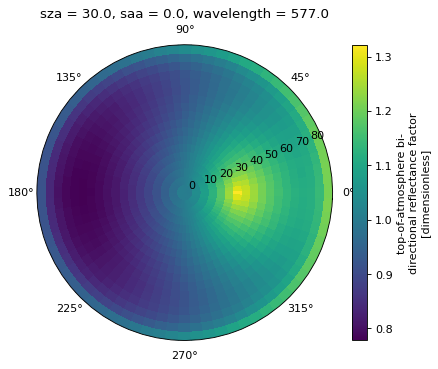

In [8]:
import matplotlib.pyplot as plt
import eradiate.util.plot as ertplt

brf = ds.brf
brf.squeeze().ert.plot_pcolormesh_polar()
ertplt.remove_xylabels()
plt.show()

It would also be interesting to visualise a slice of this data set in the principal plane. For that purpose, Eradiate provides a convience function which slices a hemispherical data set to extract a view in the principal plane \[[eradiate.util.xarray.pplane()](../../../rst/api_reference/generated/eradiate.util.xarray.pplane.rst#eradiate.util.xarray.pplane)\]. This function produces a new data set which can then be plotted as any other xarray data set and we will access it using Eradiate's xarray accessor:

In [9]:
pplane_data = ds.brf.ert.extract_pplane()
display(pplane_data)

<xarray.DataArray 'brf' (vza: 35, wavelength: 1)>
array([[0.91708857],
       [0.83758962],
       [0.8034924 ],
       [0.78747926],
       [0.78042213],
       [0.77829293],
       [0.78153969],
       [0.79009636],
       [0.79982626],
       [0.81248632],
       [0.8271929 ],
       [0.8472789 ],
       [0.86763666],
       [0.88936862],
       [0.9148918 ],
       [0.94292451],
       [0.97193799],
       [1.00575156],
       [1.04159022],
       [1.08258404],
       [1.12693861],
       [1.17816106],
       [1.24299809],
       [1.32175225],
       [1.27708102],
       [1.24207998],
       [1.20715628],
       [1.18110005],
       [1.1565577 ],
       [1.13536106],
       [1.12216492],
       [1.11407084],
       [1.11980156],
       [1.14375001],
       [1.20945376]])
Coordinates:
    sza         float64 30.0
    saa         float64 0.0
  * vza         (vza) float64 -85.0 -80.0 -75.0 -70.0 ... 70.0 75.0 80.0 85.0
  * wavelength  (wavelength) float64 577.0
Attributes:
    standard_name:  toa_brf
    long_name:      top-of-atmosphere bi-directional reflectance factor
    units:          dimensionless

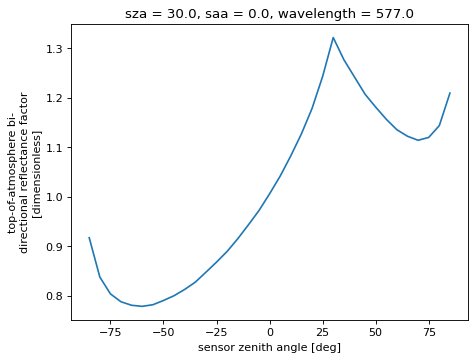

In [10]:
pplane_data.plot()
plt.show()